In [1]:
import pandas as pd
import numpy as np
import os
import neurokit2 as nk
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import gc
%matplotlib inline

In [2]:
import numpy as np
from scipy.stats import rankdata, norm




def xi_correlation(x, y, continuous=False):
    """Compute the correlation coefficient between x and y according to the xi coefficient defined by Chatterjee.

    Usage::
        >>> size = 250
        >>> x = np.linspace(start=-5, stop=5, num=size)
        >>> y = x / 2 + np.sin(x) + 0.2 * np.random.normal(size)
        >>> xi_correlation(

    :param x: A list.
    :param y: A list.
    :rtype: A tuple of real.
    """
    
    
    
    def rank_order(vector):
        random_index = np.random.choice(np.arange(length), length, replace=False)
        randomized_vector = vector[random_index]
        ranked_vector = rankdata(randomized_vector, method="ordinal")
        answer = [ranked_vector[j] for _, j in sorted(zip(random_index, range(length)))]
        return answer
    
    
    
    
    def compute_d_sequence(y):
        l = rankdata([-i for i in y], method="max")
        return np.sum(l * (length - l)) / (length ** 3)
    
    
    
    
    def compute_xi_coefficient(vector):
        mean_absolute = np.sum(np.abs([a - b for a, b in zip(vector[:- 1], vector[1:])]))
        return 1 - mean_absolute / (2 * (length**2) * d_sequence)
    
    
    
    
    def compute_p_value(continuous=continuous):
        
        if continuous:
            sigma = 2 / 5
        
        else:
            sorted_x_ordered = sorted(x_ordered_max_rank)
            
            index = [i for i in range(1, length+1)]
            doubled_index = [2 * length - 2 * i + 1 for i in index]
            cumulative_sum = np.cumsum(sorted_x_ordered)
            
            a = np.sum([i * (u**2) for i, u in zip(doubled_index, sorted_x_ordered)]) / (length ** 4)
            b = np.sum([v + (length - i) * u for i, u, v in zip(index, sorted_x_ordered, cumulative_sum)]) / (length ** 5)
            c = np.sum([i * u for i, u in zip(doubled_index, sorted_x_ordered)]) / (length ** 3)
            
            tau_squared = (a - 2 * b + np.square(c)) / (np.square(d_sequence))
            
            sigma = np.sqrt(tau_squared)
        
        
        
        p_value = 1 - norm.cdf(np.sqrt(length) * correlation / np.sqrt(sigma))
        
        return p_value
    

    
    x, y = np.array(x), np.array(y)
    length = len(x)
    
    x_ordered = np.argsort(rank_order(x))
    y_rank_max = rankdata(y, method="max")
    x_ordered_max_rank = y_rank_max[x_ordered]
    d_sequence = compute_d_sequence(y)
    
    correlation = compute_xi_coefficient(x_ordered_max_rank)
    p_value = compute_p_value(continuous=continuous)
    
    return correlation, p_value






import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





def correlation_matrix(dataframe, correlation_function, **kwargs):
    """Compute the correlation coefficient for each variable in the dataframe according to the correlation function choosed.

    Usage::
        >>> from Xi_correlation import xi_correlation
        >>> size = 250
        >>> x = np.linspace(start=-5, stop=5, num=size)
        >>> y = x / 2 + np.sin(x) + 0.2 * np.random.normal(size=size)
        >>> z = (x ** 2) / 5 + 0.2 * np.random.normal(size=size)
        >>> X = pd.DataFrame({'x': x, 'y': y, 'z': z})
        >>> matrix = correlation_matrix(X, xi_correlation)

    :param dataframe: A pandas DataFrame.
    :param correlation_function: A function, returning tuple (coefficient, pvalue).
    :rtype: A pandas DataFrame.
    """
    
    
    n_columns = dataframe.shape[1]
    matrix = np.zeros((n_columns, n_columns))
    
    
    x_index = 0
    for x_column in dataframe.columns:
        
        y_index = 0
        for y_column in dataframe.columns:
            correlation, _ = correlation_function(dataframe[x_column], dataframe[y_column], **kwargs)
            matrix[y_index, x_index] = correlation
            
            y_index += 1
        
        x_index += 1
    
    matrix = pd.DataFrame(matrix, columns=dataframe.columns, index=dataframe.columns)
    return matrix







def show_correlation_matrix(dataframe, correlation_function, **kwargs):
    """Show the correlation matrix for a given dataframe according to the correlation function given.

    Usage::
        >>> from Xi_correlation import xi_correlation
        >>> size = 250
        >>> x = np.linspace(start=-5, stop=5, num=size)
        >>> y = x / 2 + np.sin(x) + 0.2 * np.random.normal(size=size)
        >>> z = (x ** 2) / 5 + 0.2 * np.random.normal(size=size)
        >>> X = pd.DataFrame({'x': x, 'y': y, 'z': z})
        >>> show_correlation_matrix(X, xi_correlation)

    :param dataframe: A pandas DataFrame.
    :param correlation_function: A function, returning tuple (coefficient, pvalue).
    :rtype: A matplotlib type plot
    """
    
    
    matrix = correlation_matrix(dataframe, correlation_function, **kwargs)
    sns.heatmap(matrix, annot=True, fmt='f', linewidths=0.5, cmap='Reds')
    plt.show()


(np.float64(0.828627314509258), np.float64(0.0))


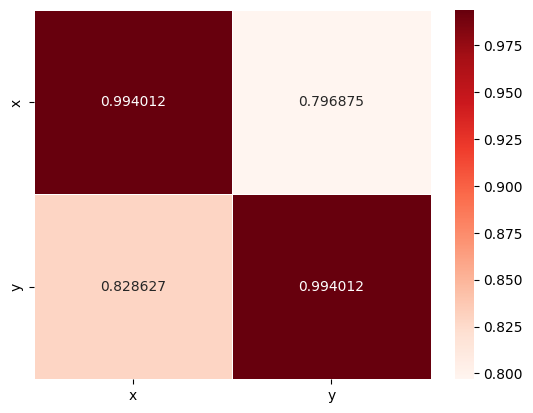

In [6]:
import numpy as np
import pandas as pd




size = 500
x = np.linspace(start=-15, stop=15, num=size)
y = x / 2 + np.sin(x) + 0.8 * np.random.normal(size=size)
df = pd.DataFrame({'x': x, 'y': y})



print(xi_correlation(x, y))
show_correlation_matrix(df, xi_correlation)

In [22]:
data_full_biopac = pd.read_csv('/Users/annapalatkina/Desktop/drive/driving_performance_project/notebooks/data_full_biopac.csv')
data_full_biopac

,Row,Timestamp,EDA_biopac,EventLabel,Participant
0,4507.0,10545.0005,1.191406,Silence,I8L4N6G7
1,4508.0,10550.0005,1.192017,Silence,I8L4N6G7
2,4509.0,10555.0005,1.191711,Silence,I8L4N6G7
3,4514.0,10560.0005,1.192322,Silence,I8L4N6G7
4,4515.0,10565.0005,1.192322,Silence,I8L4N6G7
...,...,...,...,...,...
3050935,397469.0,933564.2909,1.839600,Silence,K4G7Y9O2
3050936,397471.0,933569.2909,1.841431,Silence,K4G7Y9O2
3050937,397472.0,933574.2909,1.839905,Silence,K4G7Y9O2
3050938,397473.0,933579.2909,1.840210,Silence,K4G7Y9O2


In [23]:
data_full_empatica = pd.read_csv('/Users/annapalatkina/Desktop/drive/driving_performance_project/notebooks/full_empatica.csv')
data_full_empatica

,Unnamed: 0,miliseconds,EDA,EventLabel,Participant,time_iso,samplingFrequencyEDA,file_name,Participant_ID
0,0,10656.974,0.183283,Silence,I8L4N6G7,2025-05-20 10:09:16.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
1,1,10906.974,0.181575,Silence,I8L4N6G7,2025-05-20 10:09:17.034974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
2,2,11156.974,0.180707,Silence,I8L4N6G7,2025-05-20 10:09:17.284974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
3,3,11406.974,0.180892,Silence,I8L4N6G7,2025-05-20 10:09:17.534974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
4,4,11656.974,0.181561,Silence,I8L4N6G7,2025-05-20 10:09:17.784974,4.000271,1-1-I8L4N6G7_1747733961.avro,1-1-I8L4N6G7
...,...,...,...,...,...,...,...,...,...
57417,57417,932538.052,0.007909,Silence,K4G7Y9O2,2025-05-19 09:54:34.822052,4.000344,1-1-K4G7Y9O2_1747647109.avro,1-1-K4G7Y9O2
57418,57418,932788.052,0.008236,Silence,K4G7Y9O2,2025-05-19 09:54:35.072052,4.000344,1-1-K4G7Y9O2_1747647109.avro,1-1-K4G7Y9O2
57419,57419,933038.052,0.007539,Silence,K4G7Y9O2,2025-05-19 09:54:35.322052,4.000344,1-1-K4G7Y9O2_1747647109.avro,1-1-K4G7Y9O2
57420,57420,933288.052,0.008492,Silence,K4G7Y9O2,2025-05-19 09:54:35.572052,4.000344,1-1-K4G7Y9O2_1747647109.avro,1-1-K4G7Y9O2


In [24]:
participants = data_full_empatica.Participant.unique()
data_full_biopac = data_full_biopac.query('Participant in @participants')
print(len(participants))

16


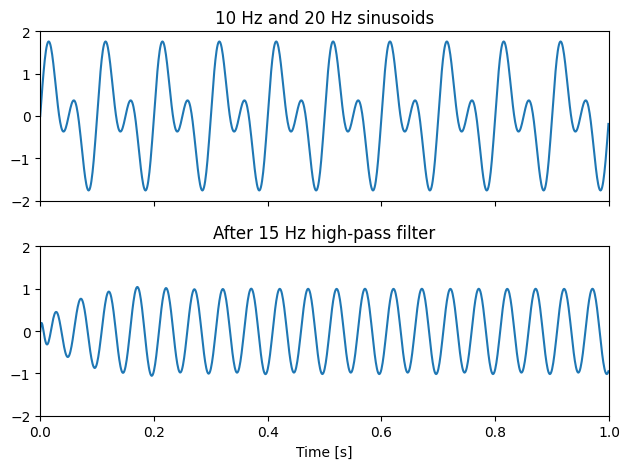

In [30]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 1000, False)  # 1 second
#sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [s]')
plt.tight_layout()
plt.show()